# Projek Akhir Pengenalan Pola

Nama:
1. AFIF MUSYAYYIDIN 
2. ADHIPRAMANA RAIHAN YUTHADI
3. I KADEK YOGA DARMA PUTRA
4. RIEFQI ARDHYA BISMA
5. RADITYA RINANDYASWARA

### Impor modul yang diperlukan

Modul yang diperlukan untuk menjalankan kode program dibawah ini adalah pandas, statistics, scipy, math, numpy, dan matplotlib.

In [130]:
import pandas as pd
import statistics as sta
from scipy.stats import norm
import math
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

## Fase Training

### 1. Impor dataset yang digunakan untuk klasifikasi

Dataset yang digunakan merupakan data pasien yang terkena kanker dalam bentuk csv.

In [131]:
data = pd.read_csv("/Users/radityarin/Documents/Kuliah/Pattern Recognition/Projek/training.csv",sep=';')
print(data)

     clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
395                3                        1                         1   
396                3                        1                         1   
397                4                        1                         1   
398                3                        2                         1   
399                1                        2                         3   

     marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                    1         

### 2. Pengelompokkan Data Berdasarkan Kelasnya dan Mencari Nilai Prior

Terdapat dua buah kelas pada dataset ini yaitu kelas 2 dan 4. Untuk mencari nilai prior rumus yang digunakan adalah :
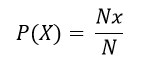
Dimana: <br>
Nx = Jumlah data pada kelas x <br>
N  = Jumlah seluruh data 

In [132]:
clump_thickness_2 = []
clump_thickness_4 = []

uniformity_of_cell_size_2 = []
uniformity_of_cell_size_4 = []

uniformity_of_cell_shape_2 = []
uniformity_of_cell_shape_4 = []

marginal_adhesion_2 = []
marginal_adhesion_4 = []

single_epithelial_cell_size_2 = []
single_epithelial_cell_size_4 = []

bare_nuclei_2 = []
bare_nuclei_4 = []

bland_chromatin_2 = []
bland_chromatin_4 = []

normal_nucleoli_2 = []
normal_nucleoli_4 = []

mitosis_2 = []
mitosis_4 = []


for i in range(len(data.kelas)):
    if data.kelas[i] == 2:
        clump_thickness_2.append(data.clump_thickness[i])
        uniformity_of_cell_size_2.append(data.uniformity_of_cell_size[i])
        uniformity_of_cell_shape_2.append(data.uniformity_of_cell_shape[i])
        marginal_adhesion_2.append(data.marginal_adhesion[i])
        single_epithelial_cell_size_2.append(data.single_epithelial_cell_size[i])
        bare_nuclei_2.append(data.bare_nuclei[i])
        bland_chromatin_2.append(data.bland_chromatin[i])
        normal_nucleoli_2.append(data.normal_nucleoli[i])
        mitosis_2.append(data.mitosis[i])
    else:
        clump_thickness_4.append(data.clump_thickness[i])
        uniformity_of_cell_size_4.append(data.uniformity_of_cell_size[i])
        uniformity_of_cell_shape_4.append(data.uniformity_of_cell_shape[i])
        marginal_adhesion_4.append(data.marginal_adhesion[i])
        single_epithelial_cell_size_4.append(data.single_epithelial_cell_size[i])
        bare_nuclei_4.append(data.bare_nuclei[i])
        bland_chromatin_4.append(data.bland_chromatin[i])
        normal_nucleoli_4.append(data.normal_nucleoli[i])
        mitosis_4.append(data.mitosis[i])


prior_2 = len(clump_thickness_2)/len(data.kelas)
prior_4 = len(clump_thickness_4)/len(data.kelas)

### 3. Mencari Rata-Rata dan Standar Deviasi

Untuk mengklasifikasikan data kontinyu menggunakan metode Naive Bayes, harus dicari rata-rata (mean) dan standar deviasi. Rata-rata dan standar deviasi dihitung sebanyak jumlah fitur(kolom) yang ada pada dataset. 

In [133]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

In [134]:
mean_clump_thickness_2 = mean(clump_thickness_2)
std_clump_thickness_2 = stdev(clump_thickness_2)

mean_uniformity_of_cell_size_2 = mean(uniformity_of_cell_size_2)
std_uniformity_of_cell_size_2 = stdev(uniformity_of_cell_size_2)

mean_uniformity_of_cell_shape_2 = mean(uniformity_of_cell_shape_2)
std_uniformity_of_cell_shape_2 = stdev(uniformity_of_cell_shape_2)

mean_marginal_adhesion_2 = mean(marginal_adhesion_2)
std_marginal_adhesion_2 = stdev(marginal_adhesion_2)

mean_single_epithelial_cell_size_2 = mean(single_epithelial_cell_size_2)
std_single_epithelial_cell_size_2 = stdev(single_epithelial_cell_size_2)

mean_bare_nuclei_2 = mean(bare_nuclei_2)
std_bare_nuclei_2 = stdev(bare_nuclei_2)

mean_bland_chromatin_2 = mean(bland_chromatin_2)
std_bland_chromatin_2 = stdev(bland_chromatin_2)

mean_normal_nucleoli_2 = mean(normal_nucleoli_2)
std_normal_nucleoli_2 = stdev(normal_nucleoli_2)

mean_mitosis_2 = mean(mitosis_2)
std_mitosis_2 = stdev(mitosis_2)

mean_clump_thickness_4 = mean(clump_thickness_4)
std_clump_thickness_4 = stdev(clump_thickness_4)

mean_uniformity_of_cell_size_4 = mean(uniformity_of_cell_size_4)
std_uniformity_of_cell_size_4 = stdev(uniformity_of_cell_size_4)

mean_uniformity_of_cell_shape_4 = mean(uniformity_of_cell_shape_4)
std_uniformity_of_cell_shape_4 = stdev(uniformity_of_cell_shape_4)

mean_marginal_adhesion_4 = mean(marginal_adhesion_4)
std_marginal_adhesion_4 = stdev(marginal_adhesion_4)

mean_single_epithelial_cell_size_4 = mean(single_epithelial_cell_size_4)
std_single_epithelial_cell_size_4 = stdev(single_epithelial_cell_size_4)

mean_bare_nuclei_4 = mean(bare_nuclei_4)
std_bare_nuclei_4 = stdev(bare_nuclei_4)

mean_bland_chromatin_4 = mean(bland_chromatin_4)
std_bland_chromatin_4 = stdev(bland_chromatin_4)

mean_normal_nucleoli_4 = mean(normal_nucleoli_4)
std_normal_nucleoli_4 = stdev(normal_nucleoli_4)

mean_mitosis_4 = mean(mitosis_4)
std_mitosis_4 = stdev(mitosis_4)

### 5. Menghitung Nilai Likelihood

Langkah selanjutnya adalah menghitung nilai likelihood untuk setiap fitur yang ada pada tiap-tiap kelas. Berikut adalah rumus perhitunganya:
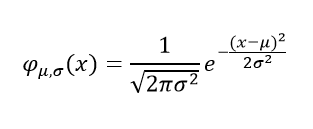
Dimana: <br>
σ = Nilai standar deviasi <br>
μ = Nilai rata-rata <br>
x = Nilai pada fitur

In [135]:
dataT = pd.read_csv("/Users/radityarin/Documents/Kuliah/Pattern Recognition/Projek/testing.csv",sep=';')

In [136]:
def calculate_probability(x, mean, stdev):
    exponent = math.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * 3.14) * stdev)) * exponent

In [170]:
likelihood_clump_thickness_2 = []
likelihood_uniformity_of_cell_size_2 = []
likelihood_uniformity_of_cell_shape_2 = []
likelihood_marginal_adhesion_2 = []
likelihood_single_epithelial_cell_size_2 = []
likelihood_bare_nuclei_2 = []
likelihood_bland_chromatin_2 = []
likelihood_normal_nucleoli_2 = []
likelihood_mitosis_2 = []

likelihood_clump_thickness_4 = []
likelihood_uniformity_of_cell_size_4 = []
likelihood_uniformity_of_cell_shape_4 = []
likelihood_marginal_adhesion_4 = []
likelihood_single_epithelial_cell_size_4 = []
likelihood_bare_nuclei_4 = []
likelihood_bland_chromatin_4 = []
likelihood_normal_nucleoli_4 = []
likelihood_mitosis_4 = []

for i in range(len(dataT.mitosis)) :
    likelihood_clump_thickness_2.append(calculate_probability(dataT.clump_thickness[i],mean_clump_thickness_2,std_clump_thickness_2))
    likelihood_uniformity_of_cell_size_2.append(calculate_probability(dataT.uniformity_of_cell_size[i],mean_uniformity_of_cell_size_2,std_uniformity_of_cell_size_2))
    likelihood_uniformity_of_cell_shape_2.append(calculate_probability(dataT.uniformity_of_cell_shape[i],mean_uniformity_of_cell_shape_2,std_uniformity_of_cell_shape_2))
    likelihood_marginal_adhesion_2.append(calculate_probability(dataT.marginal_adhesion[i],mean_marginal_adhesion_2,std_marginal_adhesion_2))
    likelihood_single_epithelial_cell_size_2.append(calculate_probability(dataT.single_epithelial_cell_size[i],mean_single_epithelial_cell_size_2,std_single_epithelial_cell_size_2))
    likelihood_bare_nuclei_2.append(calculate_probability(dataT.bare_nuclei[i],mean_bare_nuclei_2,std_bare_nuclei_2))
    likelihood_bland_chromatin_2.append(calculate_probability(dataT.bland_chromatin[i],mean_bland_chromatin_2,std_bland_chromatin_2))
    likelihood_normal_nucleoli_2.append(calculate_probability(dataT.normal_nucleoli[i],mean_normal_nucleoli_2,std_normal_nucleoli_2))
    likelihood_mitosis_2.append(calculate_probability(dataT.mitosis[i],mean_mitosis_2,std_mitosis_2))

    likelihood_clump_thickness_4.append(calculate_probability(dataT.clump_thickness[i],mean_clump_thickness_4,std_clump_thickness_4))
    likelihood_uniformity_of_cell_size_4.append(calculate_probability(dataT.uniformity_of_cell_size[i],mean_uniformity_of_cell_size_4,std_uniformity_of_cell_size_4))
    likelihood_uniformity_of_cell_shape_4.append(calculate_probability(dataT.uniformity_of_cell_shape[i],mean_uniformity_of_cell_shape_4,std_uniformity_of_cell_shape_4))
    likelihood_marginal_adhesion_4.append(calculate_probability(dataT.marginal_adhesion[i],mean_marginal_adhesion_4,std_marginal_adhesion_4))
    likelihood_single_epithelial_cell_size_4.append(calculate_probability(dataT.single_epithelial_cell_size[i],mean_single_epithelial_cell_size_4,std_single_epithelial_cell_size_4))
    likelihood_bare_nuclei_4.append(calculate_probability(dataT.bare_nuclei[i],mean_bare_nuclei_4,std_bare_nuclei_4))
    likelihood_bland_chromatin_4.append(calculate_probability(dataT.bland_chromatin[i],mean_bland_chromatin_4,std_bland_chromatin_4))
    likelihood_normal_nucleoli_4.append(calculate_probability(dataT.normal_nucleoli[i],mean_normal_nucleoli_4,std_normal_nucleoli_4))
    likelihood_mitosis_4.append(calculate_probability(dataT.mitosis[i],mean_mitosis_4,std_mitosis_4))


## Fase Testing

### 1. Melakukan Plotting Data 

Plotting dilakukan untuk mengetahui distribusi data pada tiap-tiap fitur yang ada didalam data yang akan diuji.

In [138]:
test_clump_thickness_2 = []
test_clump_thickness_4 = []

test_uniformity_of_cell_size_2 = []
test_uniformity_of_cell_size_4 = []

test_uniformity_of_cell_shape_2 = []
test_uniformity_of_cell_shape_4 = []

test_marginal_adhesion_2 = []
test_marginal_adhesion_4 = []

test_single_epithelial_cell_size_2 = []
test_single_epithelial_cell_size_4 = []

test_bare_nuclei_2 = []
test_bare_nuclei_4 = []

test_bland_chromatin_2 = []
test_bland_chromatin_4 = []

test_normal_nucleoli_2 = []
test_normal_nucleoli_4 = []

test_mitosis_2 = []
test_mitosis_4 = []

for i in range(len(dataT.kelas)):
    if dataT.kelas[i] == 2:
        test_clump_thickness_2.append(dataT.clump_thickness[i])
        test_uniformity_of_cell_size_2.append(dataT.uniformity_of_cell_size[i])
        test_uniformity_of_cell_shape_2.append(dataT.uniformity_of_cell_shape[i])
        test_marginal_adhesion_2.append(dataT.marginal_adhesion[i])
        test_single_epithelial_cell_size_2.append(dataT.single_epithelial_cell_size[i])
        test_bare_nuclei_2.append(dataT.bare_nuclei[i])
        test_bland_chromatin_2.append(dataT.bland_chromatin[i])
        test_normal_nucleoli_2.append(dataT.normal_nucleoli[i])
        test_mitosis_2.append(dataT.mitosis[i])
    else:
        test_clump_thickness_4.append(dataT.clump_thickness[i])
        test_uniformity_of_cell_size_4.append(dataT.uniformity_of_cell_size[i])
        test_uniformity_of_cell_shape_4.append(dataT.uniformity_of_cell_shape[i])
        test_marginal_adhesion_4.append(dataT.marginal_adhesion[i])
        test_single_epithelial_cell_size_4.append(dataT.single_epithelial_cell_size[i])
        test_bare_nuclei_4.append(dataT.bare_nuclei[i])
        test_bland_chromatin_4.append(dataT.bland_chromatin[i])
        test_normal_nucleoli_4.append(dataT.normal_nucleoli[i])
        test_mitosis_4.append(dataT.mitosis[i])
        
totData2 = list(range(0, len(test_clump_thickness_2)))
totData4 = list(range(0, len(test_clump_thickness_4)))

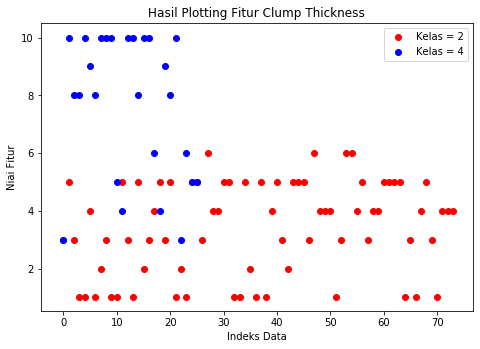

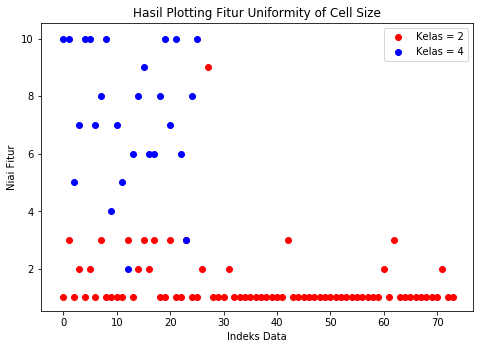

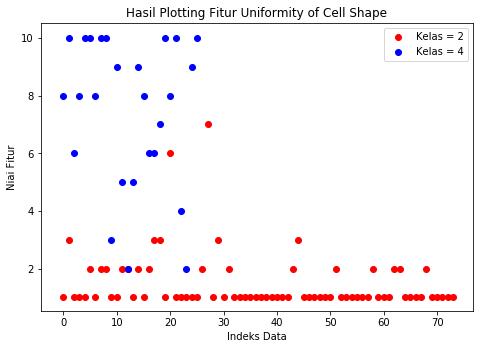

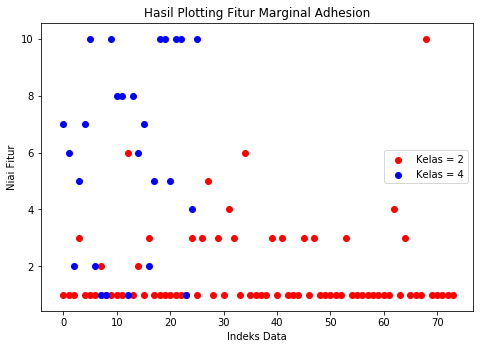

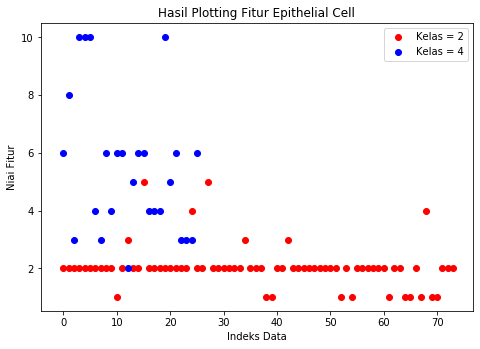

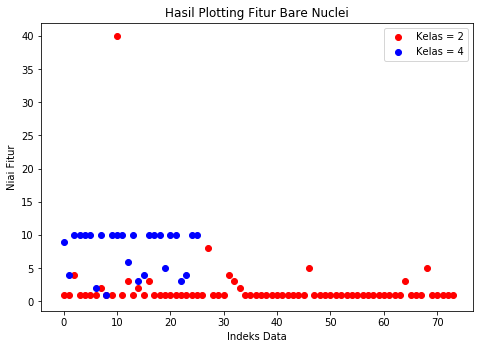

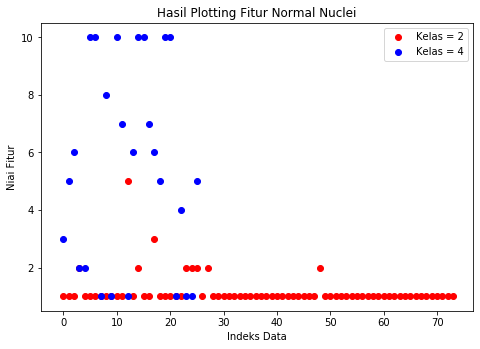

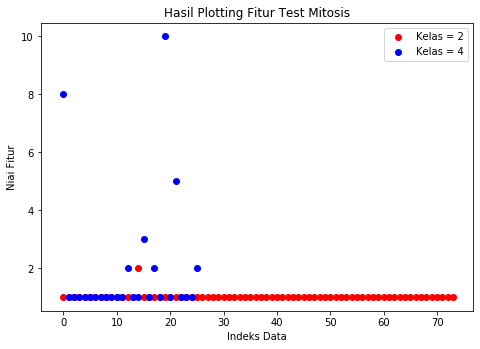

In [139]:
fig1=plt.figure()
ax1=fig1.add_axes([0,0,1,1])
ax1.scatter(totData2, test_clump_thickness_2, color='r', label='Kelas = 2')
ax1.scatter(totData4, test_clump_thickness_4, color='b', label='Kelas = 4')
ax1.legend()
ax1.set_xlabel('Indeks Data')
ax1.set_ylabel('Niai Fitur')
ax1.set_title('Hasil Plotting Fitur Clump Thickness')

fig2=plt.figure()
ax2=fig2.add_axes([0,0,1,1])
ax2.scatter(totData2, test_uniformity_of_cell_size_2, color='r', label='Kelas = 2')
ax2.scatter(totData4, test_uniformity_of_cell_size_4, color='b', label='Kelas = 4')
ax2.legend()
ax2.set_xlabel('Indeks Data')
ax2.set_ylabel('Niai Fitur')
ax2.set_title('Hasil Plotting Fitur Uniformity of Cell Size')

fig3=plt.figure()
ax3=fig3.add_axes([0,0,1,1])
ax3.scatter(totData2, test_uniformity_of_cell_shape_2, color='r', label='Kelas = 2')
ax3.scatter(totData4, test_uniformity_of_cell_shape_4, color='b', label='Kelas = 4')
ax3.legend()
ax3.set_xlabel('Indeks Data')
ax3.set_ylabel('Niai Fitur')
ax3.set_title('Hasil Plotting Fitur Uniformity of Cell Shape')

fig4=plt.figure()
ax4=fig4.add_axes([0,0,1,1])
ax4.scatter(totData2, test_marginal_adhesion_2, color='r', label='Kelas = 2')
ax4.scatter(totData4, test_marginal_adhesion_4, color='b', label='Kelas = 4')
ax4.legend()
ax4.set_xlabel('Indeks Data')
ax4.set_ylabel('Niai Fitur')
ax4.set_title('Hasil Plotting Fitur Marginal Adhesion')

fig5=plt.figure()
ax5=fig5.add_axes([0,0,1,1])
ax5.scatter(totData2, test_single_epithelial_cell_size_2, color='r', label='Kelas = 2')
ax5.scatter(totData4, test_single_epithelial_cell_size_4, color='b', label='Kelas = 4')
ax5.legend()
ax5.set_xlabel('Indeks Data')
ax5.set_ylabel('Niai Fitur')
ax5.set_title('Hasil Plotting Fitur Epithelial Cell')

fig6=plt.figure()
ax6=fig6.add_axes([0,0,1,1])
ax6.scatter(totData2, test_bare_nuclei_2, color='r', label='Kelas = 2')
ax6.scatter(totData4, test_bare_nuclei_4, color='b', label='Kelas = 4')
ax6.legend()
ax6.set_xlabel('Indeks Data')
ax6.set_ylabel('Niai Fitur')
ax6.set_title('Hasil Plotting Fitur Bare Nuclei')

fig7=plt.figure()
ax7=fig7.add_axes([0,0,1,1])
ax7.scatter(totData2, test_normal_nucleoli_2, color='r', label='Kelas = 2')
ax7.scatter(totData4, test_normal_nucleoli_4, color='b', label='Kelas = 4')
ax7.legend()
ax7.set_xlabel('Indeks Data')
ax7.set_ylabel('Niai Fitur')
ax7.set_title('Hasil Plotting Fitur Normal Nuclei')

fig8=plt.figure()
ax8=fig8.add_axes([0,0,1,1])
ax8.scatter(totData2, test_mitosis_2, color='r', label='Kelas = 2')
ax8.scatter(totData4, test_mitosis_4, color='b', label='Kelas = 4')
ax8.legend()
ax8.set_xlabel('Indeks Data')
ax8.set_ylabel('Niai Fitur')
ax8.set_title('Hasil Plotting Fitur Test Mitosis')
plt.show()

### 2. Menghitung Nilai Posterior

Untuk menghitung nilai posterior kalikan semua nilai likelihood pada tiap fitur(kolom) dengan nilai prior untuk tiap kelasnya. 

In [171]:
posterior_2 = []
posterior_4 = []
for i in range(len(likelihood_clump_thickness_2)):
    posterior_2.append(prior_2 * likelihood_clump_thickness_2[i]*likelihood_uniformity_of_cell_size_2[i]*likelihood_uniformity_of_cell_shape_2[i]*likelihood_marginal_adhesion_2[i]*likelihood_single_epithelial_cell_size_2[i]*likelihood_bare_nuclei_2[i]*likelihood_bland_chromatin_2[i]*likelihood_normal_nucleoli_2[i]*likelihood_mitosis_2[i])
    posterior_4.append(prior_4 * likelihood_clump_thickness_4[i]*likelihood_uniformity_of_cell_size_4[i]*likelihood_uniformity_of_cell_shape_4[i]*likelihood_marginal_adhesion_4[i]*likelihood_single_epithelial_cell_size_4[i]*likelihood_bare_nuclei_4[i]*likelihood_bland_chromatin_4[i]*likelihood_normal_nucleoli_4[i]*likelihood_mitosis_4[i])
    

### 3. Menghitung Data yang Akurat dan Total Akurasinya

Setelah mendapatkan nilai posterior untuk tiap kelas yang ada hitung jumlah data hasil klasifikasi yang akurat dengan membandingkan nilai kelas yang awal dan nilai kelas hasil klasifikasi. Selanjutnya hitung total akurasi dengan membagi jumlah data hasil klasifikasi yang akurat dengan total hasil klasifikasi.

In [172]:
decision = []
for i in range(len(posterior_2)):
    if posterior_2[i]>posterior_4[i]:
        decision.append(2)
    else:
        decision.append(4)
akurasi = 0
for i in range(len(decision)):
    if decision[i] == dataT.kelas[i]:
        akurasi += 1
print(akurasi)
total_akurasi = akurasi/len(decision)
print(total_akurasi)


95
0.95
